
# ROI Simulator – Smart Real Estate Intelligence Dashboard (Updated)

This notebook analyzes the impact of smart features (solar, water recycling, smart locks, smart thermostats, integrated security, EV charging) on property ROI in Harare, using your updated real-world dataset.

**Key Goals:**
- Load and explore the real estate dataset with updated rental estimates and expense-based ROI
- Calculate Gross ROI (Traditional ROI) and Smart ROI per property
- Quantify monthly and annual savings from smart features
- Calculate Net ROI after subtracting expenses
- Compare ROI between properties with and without smart features
- Visualize results through various charts
- Provide a summary of key investment metrics


In [1]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("../data/real_estate_data_template.csv")

# Display basic structure
df.head()



,property_id,location_suburb,property_type,stand_size_sqm,building_size_sqm,bedrooms,bathrooms,sale_price_usd,rental_income_usd_monthly (est),has_solar,...,has_ev_charging,annual_rental_income_usd,ROI_percentage,annual_property_tax_usd,annual_maintenance_usd,annual_insurance_usd,annual_agent_fees_usd,total_annual_expenses_usd,net_annual_income_usd,gross_roi_percentage
0,PROP001,"Colne Valley, Harare North, Harare",Townhouse,6000.0,506.0,3,2,350000,1600,0,...,0,19200,2.04,3500.0,5250.0,1400.0,1920.0,12070.0,7130.0,5.49
1,PROP002,"Helensvale, Harare North, Harare",Townhouse,2000.0,160.0,4,3,380000,3000,1,...,0,36000,5.63,3800.0,5700.0,1520.0,3600.0,14620.0,21380.0,9.47
2,PROP003,"Borrowdale Brooke, Harare North, Harare",Townhouse,7000.0,1200.0,3,3,450000,1811,0,...,0,21732,1.45,4500.0,6750.0,1800.0,2173.2,15223.2,6508.8,4.83
3,PROP004,"Borrowdale Brooke, Harare North, Harare",Townhouse,1100.0,300.0,4,4,460000,3500,1,...,0,42000,5.32,4600.0,6900.0,1840.0,4200.0,17540.0,24460.0,9.13
4,PROP005,"Pomona, Harare North, Harare",Townhouse,578.0,225.0,3,3,375000,1400,0,...,0,16800,1.13,3750.0,5625.0,1500.0,1680.0,12555.0,4245.0,4.48



### Step 1: Calculate Gross ROI (Traditional ROI)

This is the ROI based purely on annual rental income relative to the sale price, before considering any smart feature savings or expenses. This aligns with the `roi_percent` from your original simulated data notebook.


In [3]:

# Calculate Annual Rent (already present as 'annual_rental_income_usd' from previous steps, but re-calculate for clarity)
df["annual_rent"] = df["rental_income_usd_monthly (est)"] * 12

# Calculate Gross ROI
df["gross_roi_percentage"] = (df["annual_rent"] / df["sale_price_usd"]) * 100

print("Gross ROI (Traditional ROI) for first 5 properties:")
print(df[["property_id", "gross_roi_percentage"]].head())


Gross ROI (Traditional ROI) for first 5 properties:
  property_id  gross_roi_percentage
0     PROP001              5.485714
1     PROP002              9.473684
2     PROP003              4.829333
3     PROP004              9.130435
4     PROP005              4.480000



### Step 2: Calculate Smart Feature Savings and Smart ROI

We will quantify the monthly and annual savings generated by each smart feature and then calculate a 'Smart ROI' that incorporates these savings, reflecting the enhanced return from intelligent property investments.

**Important Note on Savings Values:*

For this analysis, we are estimating monthly savings from each smart feature. It's actual savinfs from each smart feature. It's crucial to understand the nature of these savings:

* **Direct Utility Savings:**
Features like **Solar**, **Water Recycling**, **Smart Thermostats**, and **EV Charging** directly contribute to reducing monthly utility bills (electricity, water, fuel). The values assigned to these represent estimated monetary savings based on typical usage and current Zimbabwe costs.

* **Estimated Added Value / 
Indirect Benefit: **For **Smart Locks** and **Integrated Security**, the assigned values (e.g., $5 and $20 repsectively) are included in the overall savings calculation not as direct utility bill reductions, but as an **estimated monthly value representing enhanced property appeal, increased security, convenience, and potential indirect financial benefits** (such as reduced insurance premiums or prevention of losses due to theft/damage). These features significantly contribute to the property's overall attractiveness and long-term value, even if they don't directly cut a monthly bill in the same way as energy-saving technologies.

These values are illustrative and can be adjusted based on more precise data or specific market research.


In [7]:

# Estimate monthly savings from each smart feature (assumed values)
# These values are illustrative and can be adjusted based on more precise data.
SOLAR_SAVINGS = 40
WATER_RECYCLING_SAVINGS = 15
SMART_LOCKS_PERCEIVED_VALUE = 5 #Estimated added value/indirect benefit
SMART_THERMOSTATS_SAVINGS = 10 # New assumed saving
INTEGRATED_SECURITY_PERCEIVED_VALUE = 20 #Estimated added value/indirect benefit
EV_CHARGING_SAVINGS = 10 # New assumed saving

df["monthly_savings_usd"] = (    df["has_solar"] * SOLAR_SAVINGS +    df["has_water_recycling"] * WATER_RECYCLING_SAVINGS +    df["has_smart_locks"] * SMART_LOCKS_PERCEIVED_VALUE +    df["has_smart_thermostats"] * SMART_THERMOSTATS_SAVINGS +    df["has_integrated_security"] * INTEGRATED_SECURITY_PERCEIVED_VALUE +    df["has_ev_charging"] * EV_CHARGING_SAVINGS)

# Calculate annual savings
df["annual_savings_usd"] = df["monthly_savings_usd"] * 12

# Calculate lifetime savings (5-year and 10-year)
df["lifetime_savings_5yr"] = df["annual_savings_usd"] * 5
df["lifetime_savings_10yr"] = df["annual_savings_usd"] * 10

# Calculate Smart ROI (incorporating annual savings into annual rent)
df["smart_roi_percentage"] = ((df["annual_rent"] + df["annual_savings_usd"]) / df["sale_price_usd"]) * 100

print("Smart Feature Savings and Smart ROI for first 5 properties:")
print(df[["property_id", "monthly_savings_usd", "annual_savings_usd", "lifetime_savings_5yr", "lifetime_savings_10yr", "smart_roi_percentage"]].head())


Smart Feature Savings and Smart ROI for first 5 properties:
  property_id  monthly_savings_usd  annual_savings_usd  lifetime_savings_5yr  \
0     PROP001                    0                   0                     0   
1     PROP002                   60                 720                  3600   
2     PROP003                    0                   0                     0   
3     PROP004                   60                 720                  3600   
4     PROP005                   20                 240                  1200   

   lifetime_savings_10yr  smart_roi_percentage  
0                      0              5.485714  
1                   7200              9.663158  
2                      0              4.829333  
3                   7200              9.286957  
4                   2400              4.544000  



## Step 3: Subtract Expenses and Calculate Net ROI

This section calculates the total annual expenses (property taxes, maintenance, insurance, and agent fees) and then determines the Net ROI, which is the true return after accounting for all operational costs.


In [9]:

# Define expense percentages (annual) - based on previous research
PROPERTY_TAX_RATE = 0.01   # 1% of sale price
MAINTENANCE_RATE = 0.015 # 1.5% of sale price
INSURANCE_RATE = 0.004   # 0.4% of sale price
AGENT_FEE_RATE = 0.10    # 10% of annual rental income (for rental management/finding tenant)

# Calculate Annual Expenses
df["annual_property_tax_usd"] = df["sale_price_usd"] * PROPERTY_TAX_RATE
df["annual_maintenance_usd"] = df["sale_price_usd"] * MAINTENANCE_RATE
df["annual_insurance_usd"] = df["sale_price_usd"] * INSURANCE_RATE
df["annual_agent_fees_usd"] = df["annual_rental_income_usd"] * AGENT_FEE_RATE

df["total_annual_expenses_usd"] = df["annual_property_tax_usd"] +                                   df["annual_maintenance_usd"] +                                   df["annual_insurance_usd"] +                                   df["annual_agent_fees_usd"]

# Calculate Net Annual Income
df["net_annual_income_usd"] = df["annual_rental_income_usd"] - df["total_annual_expenses_usd"]

# Calculate Net ROI percentage (after expenses)
# Handle potential division by zero or NaN sale prices
df["ROI_percentage"] = (df["net_annual_income_usd"] / df["sale_price_usd"]) * 100

print("Annual Expenses and Net ROI for first 5 properties:")
print(df[["property_id", "annual_property_tax_usd", "annual_maintenance_usd", "annual_insurance_usd", "annual_agent_fees_usd", "total_annual_expenses_usd", "net_annual_income_usd", "ROI_percentage"]].head())


Annual Expenses and Net ROI for first 5 properties:
  property_id  annual_property_tax_usd  annual_maintenance_usd  \
0     PROP001                   3500.0                  5250.0   
1     PROP002                   3800.0                  5700.0   
2     PROP003                   4500.0                  6750.0   
3     PROP004                   4600.0                  6900.0   
4     PROP005                   3750.0                  5625.0   

   annual_insurance_usd  annual_agent_fees_usd  total_annual_expenses_usd  \
0                1400.0                 1920.0                    12070.0   
1                1520.0                 3600.0                    14620.0   
2                1800.0                 2173.2                    15223.2   
3                1840.0                 4200.0                    17540.0   
4                1500.0                 1680.0                    12555.0   

   net_annual_income_usd  ROI_percentage  
0                 7130.0        2.037143  
1 


### Step 4: Compare ROI by Smart Features

We will analyze the average Gross ROI for properties based on the presence or absence of each smart feature.


In [11]:

# ROI comparison by feature
smart_features = [
    'has_solar',
    'has_water_recycling',
    'has_smart_locks',
    'has_smart_thermostats',
    'has_integrated_security',
    'has_ev_charging'
]

for feature in smart_features:
    print(f"\nAverage Gross ROI by {feature}:")
    print(df.groupby(feature)["gross_roi_percentage"].mean())



Average Gross ROI by has_solar:
has_solar
0    7.616107
1    6.662945
Name: gross_roi_percentage, dtype: float64

Average Gross ROI by has_water_recycling:
has_water_recycling
0    7.190361
Name: gross_roi_percentage, dtype: float64

Average Gross ROI by has_smart_locks:
has_smart_locks
0    7.179071
1    7.856480
Name: gross_roi_percentage, dtype: float64

Average Gross ROI by has_smart_thermostats:
has_smart_thermostats
0    7.195422
1    6.436364
Name: gross_roi_percentage, dtype: float64

Average Gross ROI by has_integrated_security:
has_integrated_security
0    7.182727
1    7.286833
Name: gross_roi_percentage, dtype: float64

Average Gross ROI by has_ev_charging:
has_ev_charging
0    7.190361
Name: gross_roi_percentage, dtype: float64



### Step 5: Visualization – ROI vs Smart Features

Visualizing the distribution of Gross ROI based on the presence of smart features using box plots, and comparing average Traditional vs. Smart ROI with a bar chart.


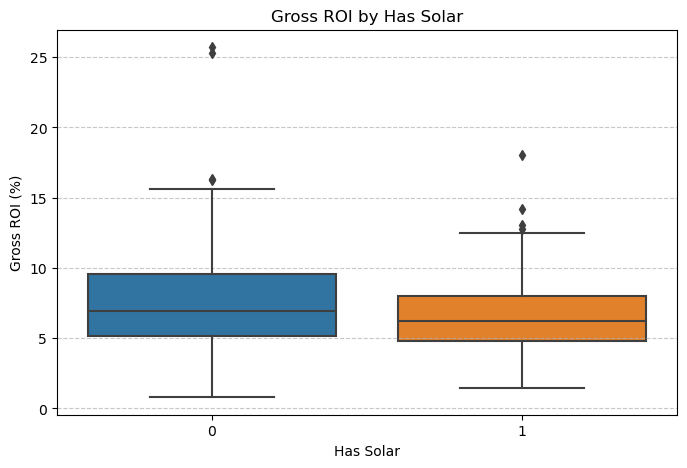

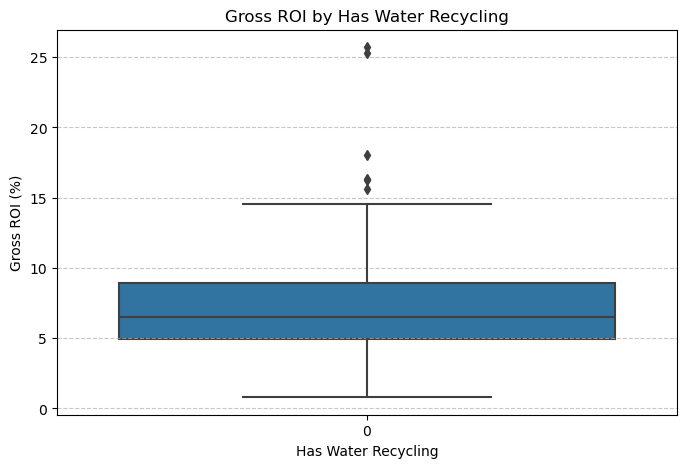

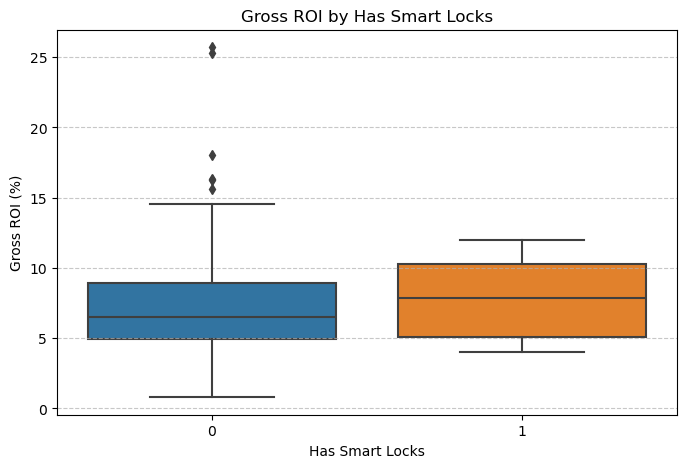

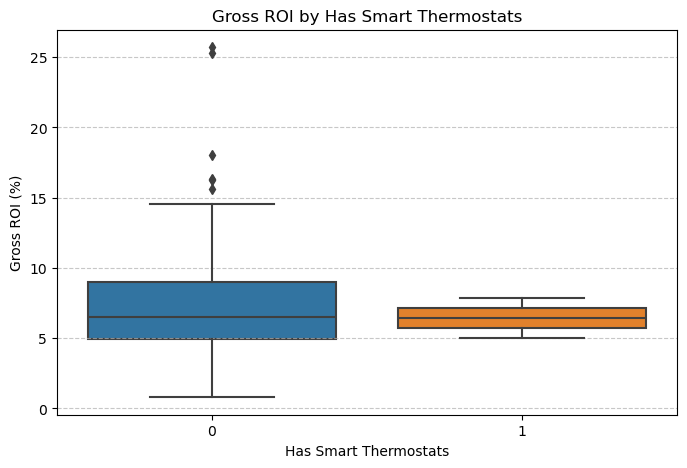

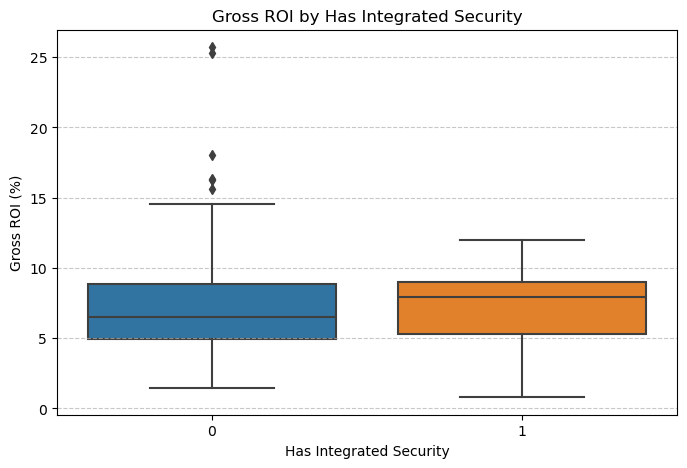

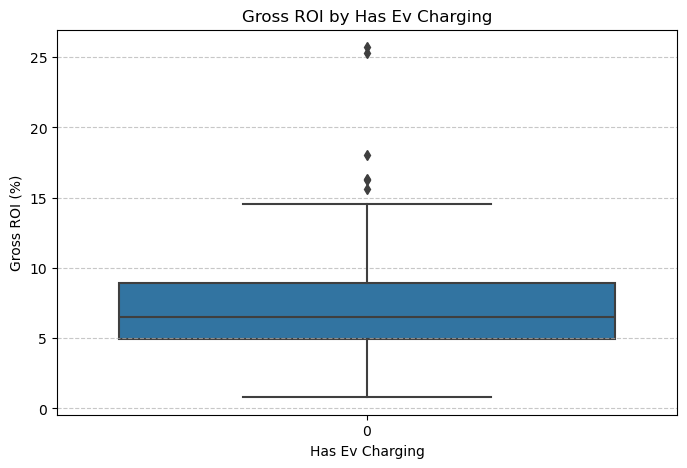

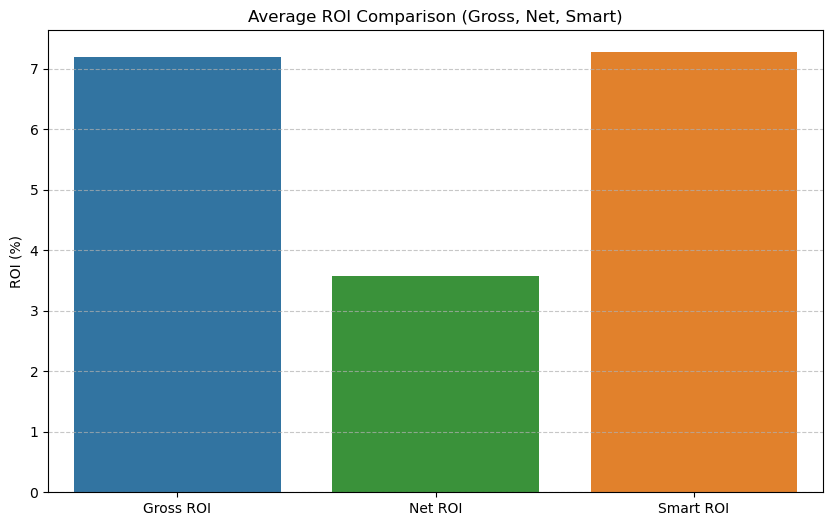

In [13]:
# Box plots for ROI by Smart Feature
for feature in smart_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=feature, y="gross_roi_percentage", data=df)
    plt.title(f"Gross ROI by {feature.replace('_', ' ').title()}")
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel("Gross ROI (%)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Bar chart for Average Traditional ROI vs Smart ROI
roi_avg = pd.DataFrame({
    'Gross ROI': [df["gross_roi_percentage"].mean()],
    'Net ROI': [df["ROI_percentage"].mean()],
    'Smart ROI': [df["smart_roi_percentage"].mean()]
}).T

plt.figure(figsize=(10, 6))
sns.barplot(x=roi_avg.index, y=roi_avg[0], palette=['#1f77b4', '#2ca02c', '#ff7f0e'])
plt.title('Average ROI Comparison (Gross, Net, Smart)')
plt.ylabel('ROI (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### Step 6: Summary Metrics

A consolidated view of key performance indicators for the real estate portfolio.


In [15]:
summary_data = {
    'Metric': [
        'Average Gross ROI (%)',
        'Average Net ROI (%)',
        'Average Smart ROI (%)',
        'Average Annual Savings (USD)',
        'Average 5-Year Savings (USD)',
        'Average 10-Year Savings (USD)',
        '% With Solar',
        '% With Water Recycling',
        '% With Smart Locks',
        '% With Smart Thermostats',
        '% With Integrated Security',
        '% With EV Charging'
    ],
    'Value': [
        df["gross_roi_percentage"].mean(),
        df["ROI_percentage"].mean(),
        df["smart_roi_percentage"].mean(),
        df["annual_savings_usd"].mean(),
        df["lifetime_savings_5yr"].mean(),
        df["lifetime_savings_10yr"].mean(),
        (df["has_solar"] == 1).mean() * 100,
        (df["has_water_recycling"] == 1).mean() * 100,
        (df["has_smart_locks"] == 1).mean() * 100,
        (df["has_smart_thermostats"] == 1).mean() * 100,
        (df["has_integrated_security"] == 1).mean() * 100,
        (df["has_ev_charging"] == 1).mean() * 100
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df["Value"] = summary_df["Value"].round(2)  # Round values for display

print("Summary Metrics:")
print(summary_df.set_index('Metric'))


Summary Metrics:
                                 Value
Metric                                
Average Gross ROI (%)             7.19
Average Net ROI (%)               3.57
Average Smart ROI (%)             7.27
Average Annual Savings (USD)    233.80
Average 5-Year Savings (USD)   1169.00
Average 10-Year Savings (USD)  2338.00
% With Solar                     44.67
% With Water Recycling            0.00
% With Smart Locks                1.67
% With Smart Thermostats          0.67
% With Integrated Security        7.33
% With EV Charging                0.00


### Summary of Key Investment Metrics and Smart Feature Impact

This analysis highlights how smart features can significantly influence property ROI,. It's important to differentiate the nature of these contributions:

* **Direct Monetary Savings:**
Features such as **Solar**, **Smart Thermostats**, and **EV Charging** provide clear, quantifiable monthly savings by reducing utility consumption. These directly enhance the financial ROI by lowering operational costs.

* **Water Recycling:**
While direct monthly monetary savings are harder to precisely quantify due to varying tariff structures and data availability, water recycling offers substantial benefits in terms of water conservation, reduced reliance on municipal supply, and environmental sustainability, which are increasingly valuable.

* **Estimated Added Value (Smart Locks & Integrated Security):**
**Smart Locks** and **Integrated Security Systems** contribute to ROI through enhanced property appeal, superior security, convenience, and peace of mind. Although their financial impact is not a direct monthly utility saving, they make the property more desirable, potentially leading to higher rental income, lower vacancy rates , and a stronger market position. They also mitigate risks, preventing potential financial losses from security breaches.

By understanding these distinct contributions, investors can make more informed decisions about incorporating smart technology to maximize both financial returns and overall property value

